In [1]:
import numpy as np
from matplotlib import pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Поступил массив отсчётов по времени силы переменного тока базовой частоты 50
Герц.

Длительность наблюдения – 1 секунда, частота дискретизации 𝜈 = 10000 Гц, обе
границы отрезка наблюдения попали в кадр.

Для полученного массива нужно получить следующие характеристики,
вычисляемые по интегральным формулам:
    
 - $ I = \frac{1}{1-0}\int\limits_0^1 I(x)dx$ - Среднее значение силы тока на отрезке
 - $ I = \sqrt{\frac{1}{1-0}\int\limits_0^1 I^2(x)dx}$ - Действующее значение силы тока на отрезке
 - Амплитудные значения гармоник сигнала при частотах 𝜈: 50, 100, 150, 200, ..., 2000 Гц:
$ ai= \sqrt{ci^2 + si^2}$;
$ci = \frac{1}{Ni}\int\limits_0^1 I(x)cos2пvxdx$;  $ci = \frac{1}{Ni}\int\limits_0^1 I(x)sin2пvxdx$; 
$Ni = (1-0)vi$

Функция 𝐼(𝑥), порождающая гармонический сигнал:

In [2]:
def I(x):
    return 12*np.sin(100*3.14*x) + 16*np.cos(100*3.14*x) - 2*np.sin(200*3.14*x) + 0.03*np.sin(500*3.14*x) - 0.01*np.cos(700*x)

def I_square(x):
    return I(x)**2

Построим функцию 𝐼(𝑥) на участке от 0 до 1:

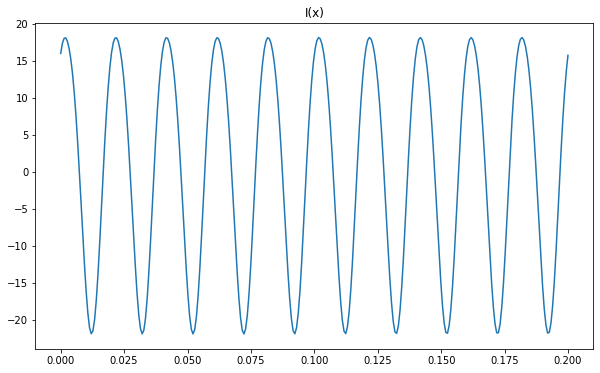

In [11]:
plt.figure(figsize(10, 6))
x = np.linspace(0, 0.2, 300)
y = [I(i) for i in np.linspace(0, 0.2, 300)]
plt.plot(x, y)
plt.title('I(x)')
plt.show()

Для вычисления интеграла будем использовать метод средних прямоугольников:

In [12]:
def average_rectangle(low, high, function, h, z = None):
    integral = 0
    while low <= high:
        if z or z == 0.:
            integral += function( (low + (low + h)) / 2, z)
        else:
            integral += function( (low + (low + h)) / 2)
        low += h
    return integral * h

##### Вычислим среднее и действующее значение силы тока на отрезке:

In [13]:
print('Среднее значение силы тока на отрезке: %.5f' % average_rectangle(0, 1, I, 0.01))
print(' ')
print('Действующее значение силы тока на отрезке: %.5f' % np.sqrt(average_rectangle(0, 1, I_square, 0.01)))

Среднее значение силы тока на отрезке: -0.32765
 
Действующее значение силы тока на отрезке: 13.27396


##### Найдем и построим амплитудные значения гармоник сигнала при частотах:

In [14]:
vi = [i for i in range(50, 2000, 50)]

def func_ci(x, v):
    return I(x) * np.cos(2*3.14*v*x)

def func_si(x, v):
    return I(x) * np.sin(2*3.14*v*x)

In [15]:
ci = []
si = []

for i in vi:
    ci.append(average_rectangle(0, 1, func_ci, 0.01, i) / i)

for i in vi:
    si.append(average_rectangle(0, 1, func_si, 0.01, i) / i)
    
ai = [np.sqrt((ci[i]**2 +si[i]**2)) for i in range(len(ci))]

In [16]:
def plotting(x, y, label):
    plt.plot(x, y,
         label = label)
    plt.legend(prop={'size': 20})

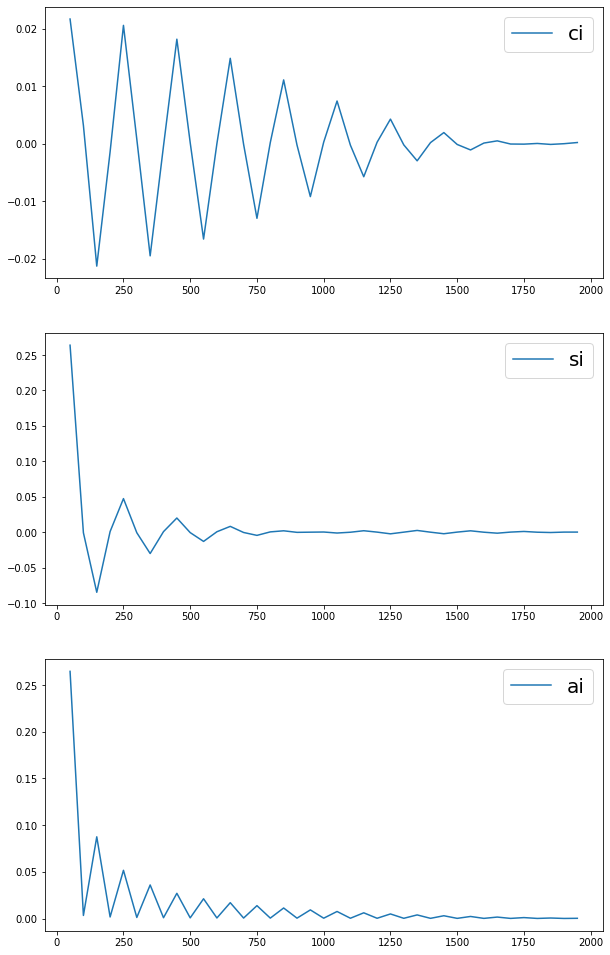

In [17]:
plt.figure(figsize(10, 17))
plt.subplot(3, 1, 1)
plotting(vi, ci, 'ci')

plt.subplot(3, 1, 2)
plotting(vi, si, 'si')

plt.subplot(3, 1, 3)
plotting(vi, ai, 'ai')